In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob as glob

In [205]:
import os
print(os.path.abspath(file))

C:\Users\rtava\Desktop\Reza\After_new_windows_installation\Research\NV Center\Simulation\BiotSavart\Gradient\Linear\Individual_Fields\Bz_Z\Field_z_direction.txt


In [230]:
def analysis(df, file, axis_name):
    
    if axis_name == 'x':
        distance = df[0] # in cm
    elif axis_name == 'y':
        distance = df[1]*1e2 # in cm
    elif axis_name == 'z':
        distance = df[2]*1e2 # in cm
        
    #gain = 100 # gradients are multiplies by this gain**n where n is the order of gradient
    field = df[5] # in mT
    
    sample_dist = np.abs(distance[1] - distance[0])
    gradient_1st = np.gradient(field, sample_dist)
    gradient_2nd = np.gradient(gradient_1st)
    gradient_3rd = np.gradient(gradient_2nd)

    fig, ax1 = plt.subplots(figsize = (6,3.7))

    color = 'tab:red'
    ax1.set_xlabel(axis_name.capitalize() + ' (cm)')
    ax1.set_ylabel('Magnetic Field (mT)', color=color)
    ax1.plot(distance, field, color=color, label = r'B$_{z}$')
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Gradient (mT/cm)', color=color)  # we already handled the x-label with ax1
    ax2.plot(distance, gradient_1st, color=color, linestyle = '-', label = '1st Order')
    ax2.plot(distance, gradient_2nd, color=color, linestyle = '-.', label = '2nd Order')
    ax2.plot(distance, gradient_3rd, color=color, linestyle = '--', label = '3rd Order')
    # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(which = 'both')
    ax1.legend()
    ax2.legend()
    plt.title('Magnetic Field and its Gradients Along ' + axis_name.capitalize() + '-axis')
    #plt.semilogx()
    #plt.title('Frequency of AM: 5530 Hz')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    save_file_name = os.path.abspath(file)[:-4] + '.png'
    plt.savefig(save_file_name, dpi = 500)

In [231]:
def analysis(df, file, axis_name):
    
    if axis_name == 'x':
        distance = df[0]*1e2 # in cm
    elif axis_name == 'y':
        distance = df[1]*1e2 # in cm
    elif axis_name == 'z':
        distance = df[2]*1e2 # in cm
        
    #gain = 100 # gradients are multiplies by this gain**n where n is the order of gradient
    field = df[5]*1e3 # in mT
    
    sample_dist = np.abs(distance[1] - distance[0])
    gradient_1st = np.gradient(field, sample_dist)
    gradient_2nd = np.gradient(gradient_1st)
    gradient_3rd = np.gradient(gradient_2nd)

    


    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)


    fig, host = plt.subplots(figsize = (7,3.5))
    fig.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.2))
    par3.spines["right"].set_position(("axes", 1.4))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    make_patch_spines_invisible(par3)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)
    par3.spines["right"].set_visible(True)

    p1, = host.plot(distance, field, 'r',label = r'B$_{z}$')
    p2, = par1.plot(distance, gradient_1st, 'b',label = '1st Gradient')
    p3, = par2.plot(distance[2:-2], gradient_2nd[2:-2] * 1e6, 'g', label = '2nd Gradient')
    p4, = par3.plot(distance[3:-3], gradient_3rd[3:-3] * 1e6, label = '3rd Gradient')

    '''host.set_xlim(0, 2)
    host.set_ylim(0, 2)
    par1.set_ylim(0, 4)
    par2.set_ylim(1, 65)'''

    host.set_xlabel(axis_name.capitalize() + ' (cm)')
    host.set_ylabel(r'B$_{z}$ (mT)')
    par1.set_ylabel(r'dB$_{z}$/dB' + axis_name)
    par2.set_ylabel(r'd$^{2}$B$_{z}$/d' + axis_name + '$^{2}$' + '  x 10$^{6}$')
    par3.set_ylabel(r'd$^{3}$B$_{z}$/d' + axis_name + '$^{3}$' + '  x 10$^{6}$')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    par3.yaxis.label.set_color(p4.get_color())

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)
    
    
    lines = [p1, p2, p3, p4]
    host.grid(which = 'both')
    #host.legend(lines, [l.get_label() for l in lines])
    plt.title('Magnetic Field and its Gradients Along ' + axis_name.capitalize() + '-axis' + '\n Field calculated by BiotSavart \n Gradients Calculated by Numpy')
    plt.tight_layout()
    save_file_name = os.path.abspath(file)[:-4] + '.png'
    plt.savefig(save_file_name, dpi = 500)

In [233]:
def analysis_gradients_3_axis(df, file, axis_name):
    
    if axis_name == 'x':
        distance = df[0] # in cm
        field_gradient = df[9]*10 # in mT/cm
    elif axis_name == 'y':
        distance = df[1]*1e2 # in cm
        field_gradient = df[10]*10 # in mT/cm
    elif axis_name == 'z':
        distance = df[2]*1e2 # in cm
        field_gradient = df[11]*10 # in mT/cm
        
    
 
    #sample_dist = np.abs(distance[1] - distance[0])
    gradient_2nd = np.gradient(field_gradient)
    gradient_3rd = np.gradient(gradient_2nd)
    gradient_4th = np.gradient(gradient_3rd)

    


    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)


    fig, host = plt.subplots(figsize = (7,3.2))
    fig.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.2))
    par3.spines["right"].set_position(("axes", 1.4))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    make_patch_spines_invisible(par3)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)
    par3.spines["right"].set_visible(True)

    p1, = host.plot(distance, field_gradient, 'r',label = r'B$_{z}$')
    p2, = par1.plot(distance, gradient_2nd* 1e6, 'b',label = '2nd Gradient')
    p3, = par2.plot(distance[2:-2], gradient_3rd[2:-2] * 1e6, 'g', label = '3rd Gradient')
    p4, = par3.plot(distance[3:-3], gradient_4th[3:-3] * 1e6, label = '4th Gradient')

    '''host.set_xlim(0, 2)
    host.set_ylim(0, 2)
    par1.set_ylim(0, 4)
    par2.set_ylim(1, 65)'''

    host.set_xlabel(axis_name.capitalize() + ' (cm)')
    host.set_ylabel(r'dB$_{z}$/dB' + axis_name + 'mT/cm')
    par1.set_ylabel(r'd$^{2}$B$_{z}$/d' + axis_name + '$^{2}$'+ '  x 10$^{6}$')
    par2.set_ylabel(r'd$^{3}$B$_{z}$/d' + axis_name + '$^{3}$' + '  x 10$^{6}$')
    par3.set_ylabel(r'd$^{4}$B$_{z}$/d' + axis_name + '$^{4}$' + '  x 10$^{6}$')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    par3.yaxis.label.set_color(p4.get_color())

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)
    
    
    lines = [p1, p2, p3, p4]
    host.grid(which = 'both')
    #host.legend(lines, [l.get_label() for l in lines])
    plt.title('Gradients Along ' + axis_name.capitalize() + '-axis' + '\n 1st Gradient is calculated by BiotSavart \n higher Gradients are Calculated by Numpy')
    plt.tight_layout()
    save_file_name = os.path.abspath(file)[:-4] + 'Biotsavart_Software, 4-axis' + '.png'
    plt.savefig(save_file_name, dpi = 500)

In [232]:
def analysis_gradients(df, file, axis_name):
    
    if axis_name == 'x':
        distance = df[0] # in cm
        field_gradient = df[9]*10 # in mT/cm
    elif axis_name == 'y':
        distance = df[1]*1e2 # in cm
        field_gradient = df[10]*10 # in mT/cm
    elif axis_name == 'z':
        distance = df[2]*1e2 # in cm
        field_gradient = df[11]*10 # in mT/cm
        
    
 

    gradient_2nd = np.gradient(field_gradient)
    gradient_3rd = np.gradient(gradient_2nd)
    gradient_4th = np.gradient(gradient_3rd)

    fig, ax1 = plt.subplots(figsize = (6,4.3))

    color = 'tab:red'
    ax1.set_xlabel(axis_name.capitalize() + ' (cm)')
    ax1.set_ylabel('Magnetic Field Gradient (mT/cm)', color=color)
    ax1.plot(distance, field_gradient, color=color, label = r'B$_{z}$')
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Higher Gradients', color=color)  # we already handled the x-label with ax1
    ax2.plot(distance, gradient_2nd, color=color, linestyle = '-', label = r'd$^{2}$Bz/d' + axis_name + r'$^{2}$')
    ax2.plot(distance, gradient_3rd, color=color, linestyle = '-.', label = r'd$^{3}$Bz/d' + axis_name + r'$^{3}$')
    ax2.plot(distance, gradient_4th, color=color, linestyle = '--', label = r'd$^{4}$Bz/d' + axis_name + r'$^{4}$')
    # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(which = 'both')
    ax1.legend()
    ax2.legend()
    plt.title('Magnetic Field Gradients Along ' + axis_name.capitalize() + '-axis')
    #plt.semilogx()
    plt.title('Gradients Along ' + axis_name.capitalize() + '-axis' + '\n 1st Gradient is calculated by BiotSavart \n higher Gradients are Calculated by Numpy')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    save_file_name = os.path.abspath(file)[:-4] + 'Biotsavart_Software, 4-axis' + '.png'
    plt.savefig(save_file_name, dpi = 500)

# dB/dZ

In [170]:
winding = 5

In [171]:
winding = 5
# for Linear gradient alpha = a/Z0 = 2/sqrt(3)
# a is radius of the coil
# z location of coils are Z0 and -Z0
Z =  0.05 #m
a = Z * 2/np.sqrt(3)
print(' Radius of linear gradient coil: {:.3f} m\n Coil separation distance: {:.3f} m'.format(a, 2*Z))

 Radius of linear gradient coil: 0.058 m
 Coil separation distance: 0.100 m


In [172]:
files_fields = glob.glob('Individual_Fields/*/F*.txt')
files_fields

['Individual_Fields\\Bz_X\\Field_x_direction.txt',
 'Individual_Fields\\Bz_X2-Z2\\Field_x_direction.txt',
 'Individual_Fields\\Bz_X2-Z2\\Field_y_direction.txt',
 'Individual_Fields\\Bz_X2-Z2\\Field_z_direction.txt',
 'Individual_Fields\\Bz_XZ\\Field_z_direction.txt',
 'Individual_Fields\\Bz_Y\\Field_y_direction.txt',
 'Individual_Fields\\Bz_Y2-Z2\\Field_x_direction.txt',
 'Individual_Fields\\Bz_Y2-Z2\\Field_y_direction.txt',
 'Individual_Fields\\Bz_Y2-Z2\\Field_z_direction.txt',
 'Individual_Fields\\Bz_YZ\\Field_z_direction.txt',
 'Individual_Fields\\Bz_Z\\Field_z_direction.txt']

In [173]:
linear_field_files = [file for file in files if len(file)<45]
linear_field_files

['Individual_Fields\\Bz_X\\Field_x_direction.txt',
 'Individual_Fields\\Bz_Y\\Field_y_direction.txt',
 'Individual_Fields\\Bz_Z\\Field_z_direction.txt']

In [174]:
parabola_field_files = [file for file in files if len(file)>45]
parabola_field_files

['Individual_Fields\\Bz_X2-Z2\\Field_x_direction.txt',
 'Individual_Fields\\Bz_X2-Z2\\Field_y_direction.txt',
 'Individual_Fields\\Bz_X2-Z2\\Field_z_direction.txt',
 'Individual_Fields\\Bz_Y2-Z2\\Field_x_direction.txt',
 'Individual_Fields\\Bz_Y2-Z2\\Field_y_direction.txt',
 'Individual_Fields\\Bz_Y2-Z2\\Field_z_direction.txt']

In [175]:
files_gradients = glob.glob('Individual_Gradients/*/G*.txt')
files_gradients

['Individual_Gradients\\Bz_X\\Gradient_x_direction.txt',
 'Individual_Gradients\\Bz_X2-Z2\\Gradient_x_direction.txt',
 'Individual_Gradients\\Bz_X2-Z2\\Gradient_y_direction.txt',
 'Individual_Gradients\\Bz_X2-Z2\\Gradient_z_direction.txt',
 'Individual_Gradients\\Bz_Y\\Gradient_y_direction.txt',
 'Individual_Gradients\\Bz_Y2-Z2\\Gradient_x_direction.txt',
 'Individual_Gradients\\Bz_Y2-Z2\\Gradient_y_direction.txt',
 'Individual_Gradients\\Bz_Y2-Z2\\Gradient_z_direction.txt',
 'Individual_Gradients\\Bz_Z\\Gradient_z_direction.txt']

In [176]:
linear_gradient_files = [file for file in files_gradients if len(file)<54]
linear_gradient_files

['Individual_Gradients\\Bz_X\\Gradient_x_direction.txt',
 'Individual_Gradients\\Bz_Y\\Gradient_y_direction.txt',
 'Individual_Gradients\\Bz_Z\\Gradient_z_direction.txt']

In [177]:
parabola_gradient_files = [file for file in files_gradients if len(file)>53]
parabola_gradient_files

['Individual_Gradients\\Bz_X2-Z2\\Gradient_x_direction.txt',
 'Individual_Gradients\\Bz_X2-Z2\\Gradient_y_direction.txt',
 'Individual_Gradients\\Bz_X2-Z2\\Gradient_z_direction.txt',
 'Individual_Gradients\\Bz_Y2-Z2\\Gradient_x_direction.txt',
 'Individual_Gradients\\Bz_Y2-Z2\\Gradient_y_direction.txt',
 'Individual_Gradients\\Bz_Y2-Z2\\Gradient_z_direction.txt']

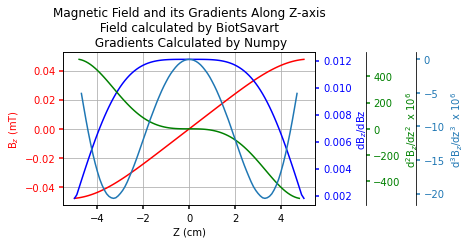

In [234]:
file = linear_field_files[2]
df = pd.read_csv(file, sep = '\t', header = None)
analysis(df, file, 'z')

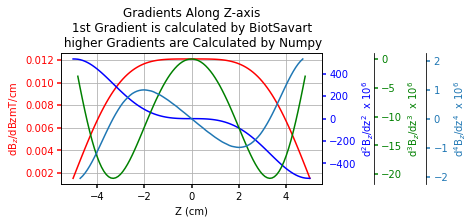

In [235]:
file = linear_gradient_files[2]
df = pd.read_csv(file, sep = '\t', header = None)
analysis_gradients_3_axis(df, file, 'z')

# dB/dY

In [218]:
yc = 1.19 * Z
w = 1.55 * Z
print(' Z: {:.2f} (m)\n yc: {:.4f} (m)\n w: {:.4f} (m)\n yc + w/2: {:.4f} (m)\n yc - w/2: {:.4f} (m)'
      .format(Z, yc, w, yc+w/2, yc-w/2))

 Z: 0.05 (m)
 yc: 0.0595 (m)
 w: 0.0775 (m)
 yc + w/2: 0.0983 (m)
 yc - w/2: 0.0207 (m)


In [219]:
# Cordinates of rectangular dBz/dBy coil:
# I used x length of 28 cm
# ( -12, yc + w/2, +Z)
# ( +12, yc + w/2, +Z)
# ( +12, yc - w/2, +Z)
# ( -12, yc - w/2 , +Z)

# Note that in BiotSavart I just changed the sign of Y cordinates to make coils at negative Y
# this means that the coils rotation are already opposite
# So JUST use same current in each coil

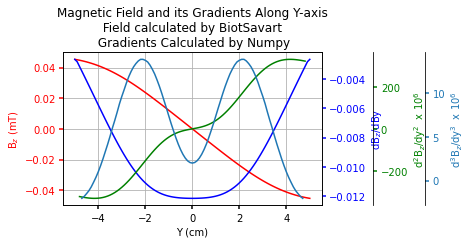

In [236]:
file = linear_field_files[1]
df = pd.read_csv(file, sep = '\t', header = None)
analysis(df, file, 'y')

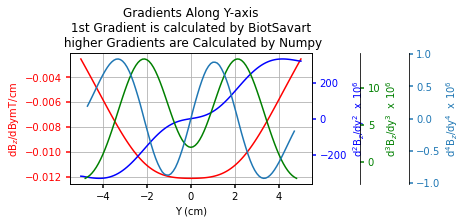

In [237]:
file = linear_gradient_files[1]
df = pd.read_csv(file, sep = '\t', header = None)
analysis_gradients_3_axis(df, file, 'y')

# dBz/dX

In [238]:
# Cordinates of rectangular dBz/dBy coil:
# I used x length of 28 cm
# ( yc + w/2, -12, +Z)
# ( yc + w/2, +12, +Z)
# ( yc - w/2, +12, +Z)
# ( yc - w/2 , -12, +Z)

# Note that in BiotSavart I just changed the sign of X cordinates to make coils at negative X
# this means that the coils rotation are already opposite
# So JUST use same current in each coil

In [239]:
xc = 1.19 * Z
w = 1.55 * Z
print(' Z: {:.2f} (m)\n xc: {:.4f} (m)\n w: {:.4f} (m)\n xc + w/2: {:.4f} (m)\n xc - w/2: {:.4f} (m)'
      .format(Z, xc, w, xc+w/2, xc-w/2))

 Z: 0.05 (m)
 xc: 0.0595 (m)
 w: 0.0775 (m)
 xc + w/2: 0.0983 (m)
 xc - w/2: 0.0207 (m)


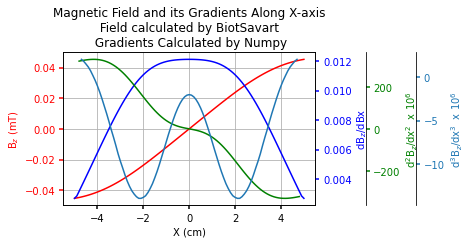

In [240]:
file = linear_field_files[0]
df = pd.read_csv(file, sep = '\t', header = None)
analysis(df, file, 'x')

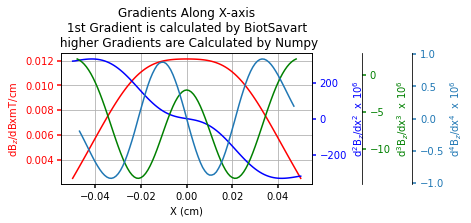

In [241]:
file = linear_gradient_files[0]
df = pd.read_csv(file, sep = '\t', header = None)
analysis_gradients_3_axis(df, file, 'x')

### Field files and gradient files for 2nd order gradient fields

In [150]:
parabola_field_files

['Individual_Fields\\Bz_X2-Z2\\Field_x_direction.txt',
 'Individual_Fields\\Bz_X2-Z2\\Field_y_direction.txt',
 'Individual_Fields\\Bz_X2-Z2\\Field_z_direction.txt',
 'Individual_Fields\\Bz_Y2-Z2\\Field_x_direction.txt',
 'Individual_Fields\\Bz_Y2-Z2\\Field_y_direction.txt',
 'Individual_Fields\\Bz_Y2-Z2\\Field_z_direction.txt']

In [151]:
parabola_gradient_files

['Individual_Gradients\\Bz_X2-Z2\\Gradient_x_direction.txt',
 'Individual_Gradients\\Bz_X2-Z2\\Gradient_y_direction.txt',
 'Individual_Gradients\\Bz_X2-Z2\\Gradient_z_direction.txt',
 'Individual_Gradients\\Bz_Y2-Z2\\Gradient_x_direction.txt',
 'Individual_Gradients\\Bz_Y2-Z2\\Gradient_y_direction.txt',
 'Individual_Gradients\\Bz_Y2-Z2\\Gradient_z_direction.txt']

# Bz ~ X^2 - Z^2

d2Bz/dX2 = -d2Bz/dZ2

In [243]:
X1 = 1.2 * Z # m
X2 = 0.81 * Z
print('Half width of inner coil: {:.3f}, Half width of outter coil: {:.3f}'.format(X2, X1))

Half width of inner coil: 0.041, Half width of outter coil: 0.060


In [228]:
# Cordinates of rectangular X^2 - Z^2 coil:
# I used x length of 28 cm
# Inner coil:
# ( -X2, -12, +Z)
# ( -X2, +12, +Z)
# ( +X2, +12, +Z)
# ( +X2, -12, +Z)
# Outter coil:
# ( -X1, +12, +Z)
# ( -X1, -12, +Z)
# ( +X1, -12, +Z)
# ( +X1, +12, +Z)

# Note that in BiotSavart to produce the 2nd pair, just change Z to -Z

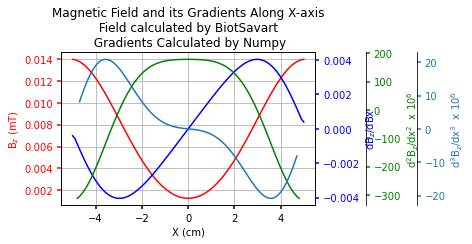

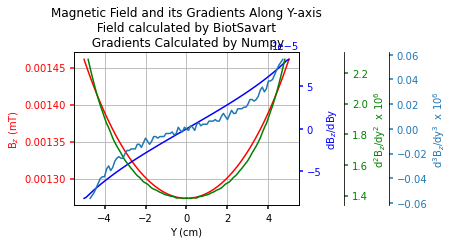

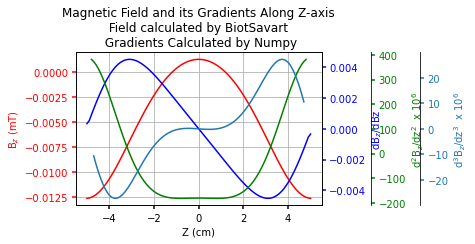

In [251]:
for i, axis in zip(range(3), ['x', 'y', 'z']):
    file = parabola_field_files[i]
    df = pd.read_csv(file, sep = '\t', header = None)
    analysis(df, file, axis)

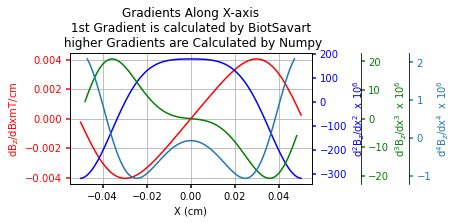

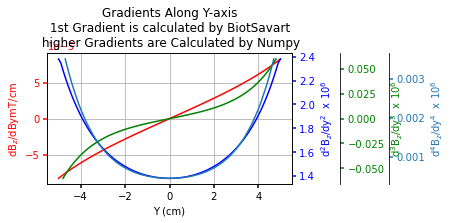

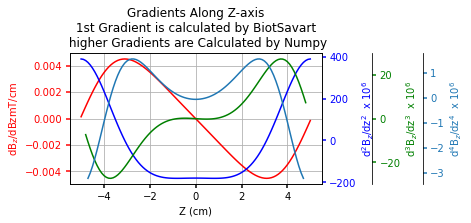

In [252]:
for i, axis in zip(range(3), ['x', 'y', 'z']):
    file = parabola_gradient_files[i]
    df = pd.read_csv(file, sep = '\t', header = None)
    analysis_gradients_3_axis(df, file, axis)

# Bz ~ Y^2 - Z^2

d2Bz/dY2 = -d2Bz/dZ2

In [248]:
Y1 = 1.2 * Z # m
Y2 = 0.81 * Z
print('Half width of inner coil: {:.3f}, Half width of outter coil: {:.3f}'.format(Y2, Y1))

Half width of inner coil: 0.041, Half width of outter coil: 0.060


In [249]:
# Cordinates of rectangular Y^2 - Z^2 coil:
# I used x length of 28 cm
# Inner coil:
# ( -12, -y2, +Z)
# ( +12, -y2, +Z)
# ( +12, +y2, +Z)
# ( -12, +y2, +Z)
# Outter coil:
# ( +12, -y1, +Z)
# ( -12, -y1, +Z)
# ( -12, +y1, +Z)
# ( +12, +y1, +Z)

# Note that in BiotSavart to produce the 2nd pair, just change Z to -Z

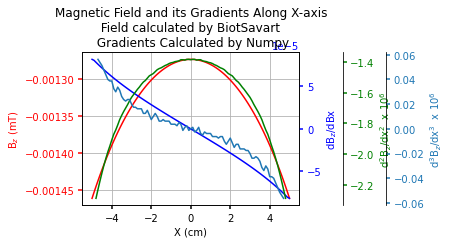

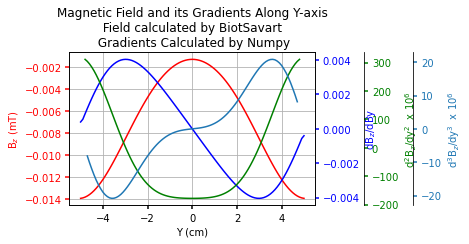

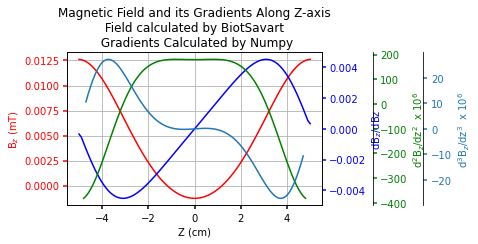

In [253]:
for i, axis in zip(range(3), ['x', 'y', 'z']):
    file = parabola_field_files[i+3]
    df = pd.read_csv(file, sep = '\t', header = None)
    analysis(df, file, axis)

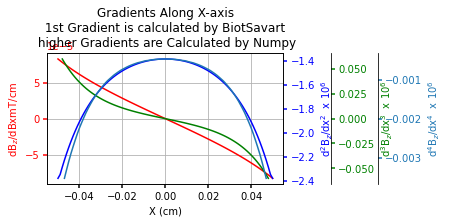

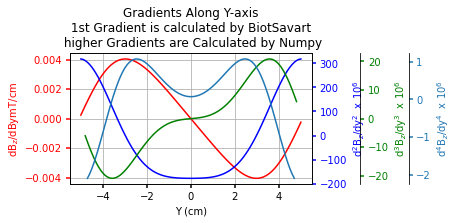

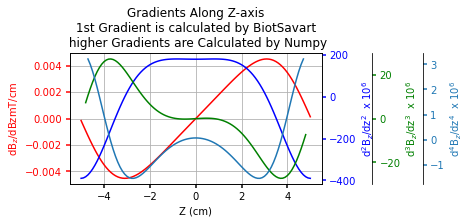

In [254]:
for i, axis in zip(range(3), ['x', 'y', 'z']):
    file = parabola_gradient_files[i+3]
    df = pd.read_csv(file, sep = '\t', header = None)
    analysis_gradients_3_axis(df, file, axis)

# Bz ~ XY

d2Bz/dXdY

In [71]:
w = 1.452 * Z
length = 0.12
print('The width of the coil: {:.3f}'.format(w))

The width of the coil: 0.073


In [72]:
x0 = length/np.sqrt(2) 
y0 = length/np.sqrt(2)

In [78]:
# coordinates of coil 1 at +Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 + w/2/np.sqrt(2), y0 - w/2/np.sqrt(2), Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-x0 + w/2/np.sqrt(2), -y0 - w/2/np.sqrt(2), Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-x0 - w/2/np.sqrt(2), -y0 + w/2/np.sqrt(2), Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 - w/2/np.sqrt(2), y0 + w/2/np.sqrt(2), Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 + w/2/np.sqrt(2), y0 - w/2/np.sqrt(2), Z))

start 	0.111	 0.059	 0.050
goto 	-0.059	 -0.111	 0.050
goto 	-0.111	 -0.059	 0.050
goto 	0.059	 0.111	 0.050
goto 	0.111	 0.059	 0.050


In [79]:
# coordinates of coil 1 at -Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 + w/2/np.sqrt(2), y0 - w/2/np.sqrt(2), -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-x0 + w/2/np.sqrt(2), -y0 - w/2/np.sqrt(2), -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-x0 - w/2/np.sqrt(2), -y0 + w/2/np.sqrt(2), -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 - w/2/np.sqrt(2), y0 + w/2/np.sqrt(2), -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 + w/2/np.sqrt(2), y0 - w/2/np.sqrt(2), -Z))

start 	0.111	 0.059	 -0.050
goto 	-0.059	 -0.111	 -0.050
goto 	-0.111	 -0.059	 -0.050
goto 	0.059	 0.111	 -0.050
goto 	0.111	 0.059	 -0.050


In [80]:
# coordinates of coil 2 at +Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 + w/2/np.sqrt(2), -y0 + w/2/np.sqrt(2), Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-x0 + w/2/np.sqrt(2), y0 + w/2/np.sqrt(2), Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-x0 - w/2/np.sqrt(2), y0 - w/2/np.sqrt(2), Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 - w/2/np.sqrt(2), -y0 - w/2/np.sqrt(2), Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 + w/2/np.sqrt(2), -y0 + w/2/np.sqrt(2), Z))

start 	0.111	 -0.059	 0.050
goto 	-0.059	 0.111	 0.050
goto 	-0.111	 0.059	 0.050
goto 	0.059	 -0.111	 0.050
goto 	0.111	 -0.059	 0.050


In [81]:
# coordinates of coil 2 at -Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 + w/2/np.sqrt(2), -y0 + w/2/np.sqrt(2), -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-x0 + w/2/np.sqrt(2), y0 + w/2/np.sqrt(2), -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-x0 - w/2/np.sqrt(2), y0 - w/2/np.sqrt(2), -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 - w/2/np.sqrt(2), -y0 - w/2/np.sqrt(2), -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(x0 + w/2/np.sqrt(2), -y0 + w/2/np.sqrt(2), -Z))

start 	0.111	 -0.059	 -0.050
goto 	-0.059	 0.111	 -0.050
goto 	-0.111	 0.059	 -0.050
goto 	0.059	 -0.111	 -0.050
goto 	0.111	 -0.059	 -0.050


In [46]:
np.sqrt(5-2*np.sqrt(5))

0.7265425280053608

# Bz~XZ

In [82]:
w = 0.52 * Z
length = 0.14
Xc = 0.850 * Z
print('The width of the coil: {:.3f}, the center of the coil: {:.3f}'.format(w, Xc))

The width of the coil: 0.026, the center of the coil: 0.043


In [96]:
'To have correct gradient, you should use negative current for coils 1 and 2 located at -z plane'

'To have correct gradient, you should use negative current for coils 1 and 2 located at -z plane'

In [83]:
# coordinates of coil 1 at +Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc + w/2, -length, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc + w/2, +length, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc - w/2, +length, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc - w/2, -length, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc + w/2, -length, Z))

start 	0.056	 -0.140	 0.050
goto 	0.056	 0.140	 0.050
goto 	0.030	 0.140	 0.050
goto 	0.030	 -0.140	 0.050
goto 	0.056	 -0.140	 0.050


In [84]:
# coordinates of coil 2 at +Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc - w/2, -length, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc - w/2, +length, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc + w/2, +length, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc + w/2, -length, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc + w/2, -length, Z))

start 	-0.056	 -0.140	 0.050
goto 	-0.056	 0.140	 0.050
goto 	-0.030	 0.140	 0.050
goto 	-0.030	 -0.140	 0.050
goto 	-0.030	 -0.140	 0.050


In [85]:
# coordinates of coil 1 at -Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc + w/2, -length, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc + w/2, +length, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc - w/2, +length, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc - w/2, -length, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(Xc + w/2, -length, -Z))

start 	0.056	 -0.140	 -0.050
goto 	0.056	 0.140	 -0.050
goto 	0.030	 0.140	 -0.050
goto 	0.030	 -0.140	 -0.050
goto 	0.056	 -0.140	 -0.050


In [87]:
# coordinates of coil 2 at -Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc - w/2, -length, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc - w/2, +length, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc + w/2, +length, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc + w/2, -length, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-Xc + w/2, -length, -Z))

start 	-0.056	 -0.140	 -0.050
goto 	-0.056	 0.140	 -0.050
goto 	-0.030	 0.140	 -0.050
goto 	-0.030	 -0.140	 -0.050
goto 	-0.030	 -0.140	 -0.050


# Bz~YZ

In [88]:
# Same as XZ coil just rotated by 90 degree around z-axis
w = 0.52 * Z
length = 0.14
Yc = 0.850 * Z
print('The width of the coil: {:.3f}, the center of the coil: {:.3f}'.format(w, Yc))

The width of the coil: 0.026, the center of the coil: 0.043


In [95]:
'To have correct gradient, you should use negative current for coils 1 and 2 located at -z plane'

'To have correct gradient, you should use negative current for coils 1 and 2 located at -z plane'

In [90]:
# coordinates of coil 1 at +Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, Yc + w/2, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(+length, Yc + w/2, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(+length, Yc - w/2, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, Yc - w/2, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format( -length, Yc + w/2, Z))

start 	-0.140	 0.056	 0.050
goto 	0.140	 0.056	 0.050
goto 	0.140	 0.030	 0.050
goto 	-0.140	 0.030	 0.050
goto 	-0.140	 0.056	 0.050


In [91]:
# coordinates of coil 2 at +Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, -Yc - w/2, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format( +length, -Yc - w/2, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(+length, -Yc + w/2, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, -Yc + w/2, Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, -Yc + w/2, Z))

start 	-0.140	 -0.056	 0.050
goto 	0.140	 -0.056	 0.050
goto 	0.140	 -0.030	 0.050
goto 	-0.140	 -0.030	 0.050
goto 	-0.140	 -0.030	 0.050


In [93]:
# coordinates of coil 1 at -Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, Yc + w/2, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(+length, Yc + w/2, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(+length, Yc - w/2, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, Yc - w/2, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format( -length, Yc + w/2, -Z))

start 	-0.140	 0.056	 -0.050
goto 	0.140	 0.056	 -0.050
goto 	0.140	 0.030	 -0.050
goto 	-0.140	 0.030	 -0.050
goto 	-0.140	 0.056	 -0.050


In [94]:
# coordinates of coil 2 at -Z
print('start \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, -Yc - w/2, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format( +length, -Yc - w/2, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(+length, -Yc + w/2, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, -Yc + w/2, -Z))
print('goto \t{:.3f}\t {:.3f}\t {:.3f}'.format(-length, -Yc + w/2, -Z))

start 	-0.140	 -0.056	 -0.050
goto 	0.140	 -0.056	 -0.050
goto 	0.140	 -0.030	 -0.050
goto 	-0.140	 -0.030	 -0.050
goto 	-0.140	 -0.030	 -0.050


In [ ]:
0.013